# TP4: Dichotomie et Descente de Gradient

Dans ce TP nous allons implémenter les méthodes vues en cours pour la recherche de minimum d'une fonction $h(x)$. Cette recherche de minimum peut aussi être vu comme la recherche des zéros de la dérivée, soit la résolution de l'équation $h'(x)=0$.

Soit les fonctions suivantes:
* $f(x) = \ln x + x^2$
* $g(x,y) = \sin(y) + x^2$ (déjà vue dans les TPs précédents).

In [8]:
import numpy as np
import matplotlib.pyplot as plt

### Exercice 1: Etude de la fonction $f$

1) Analyser la fonction $f$
- [x] donner son domaine de définition ==> ]0, +∞]
- [ ] à partir du calcul de sa dérivée, étudier les variations de $f$ (croissante, décroissante) ==> (1 + 2x^2)/x
- [ ] admet-elle un minima ?
- [ ] donner les limites de $f$ aux bornes de son domaine de définition.
- [ ] la fonction s'annule-t-elle sur cet intervalle ?
- [ ] déterminer $f(1)$, qu'en concluez-vous ?

2) Représenter la fonction $f$ sur son domaine de définition. On pourra utiliser `N=1000` points. Vous choisirez une borne maximum intéressante pour visualiser le point d'annulation.

**Attention** à vérifier que votre fonction logarithme est bien le logarithme népérien

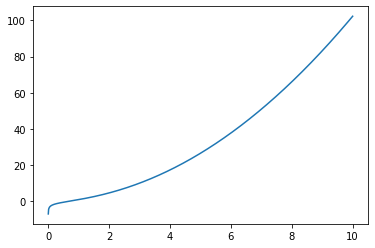

In [69]:
import numpy as np
import matplotlib.pyplot as plt

eps = 1e-3
N = 1000
def f(x):
    return np.log(x) + x**2

def fDev(x):
    return (1+2 * x**2)/x

def tracer(x):
    #plt.figure(figsize=(12,6))
    plt.plot(x, f(x))
    #plt.title('tracé de la fonction x entre 0 et 10')
    plt.show()

tracer(np.linspace(eps, 10, N))

### Exercice 2: Dichotomie

Nous avons vu en cours, que la dichotomie permettait de résoudre des équations du type $h(x)=0$ en encadrant la solution par deux valeurs $a$ et $b$ telles que $f(a) \cdot f(b) \leq 0$.

1) Proposer un programme qui prend en entrée deux réels $a< b$ et une fonction $f$ dont on cherche à déterminer la racine dans l'intervalle $[a,b]$ par dichotomie. Ce programme construit à chaque itération un nouvel intervalle $I_n$ dans lequel se trouve la solution, et une une suite $(x_n)$ qui converge vers la solution.
- [ ] penser à intialiser votre intervalle et votre suite
- [ ] tester deux approches, la première où l'intervalle $I_n$ est coupé en deux aléatoirement, la seconde où cet intervalle est coupé en sa moitié.
- [ ] ajouter une tolérance sur votre racine.
- [ ] _bonus_ ajouter un nombre d'itération maximum (pour éviter de tourner en rond...).

In [70]:
import numpy as np

def dichtomie(a, b):
    i = 0
    delta = (a + b) / 2
    while np.abs(a-b) > eps:
        delta = (a + b) / 2
        if f(a) * f(delta) <= 0:
            b = delta
        else:
            a = delta
        i+=1
    return i, delta


def secante(a, b):
    a, b = b, a - (b-a) * f(a) / (f(b) - f(a))
    i=0
    while np.abs(a - b) > eps:
        a, b = b, a - (b-a) * f(a)/ (f(b) - f(a))
        i+=1
    return i, b


def newton(a, b):
    a, b = b, a - (f(a) / fDev(a))
    i=0
    while np.abs(a - b) > eps:
        a, b = b, a - (f(a) / fDev(a))
        i+=1
    return i, b


print(f"Dichotomie : {dichtomie(eps, 1)}")
print(f"Sécante : {secante(eps, 1)}")
print(f"Newton : {newton(eps, 1)}")

Dichotomie : (10, 0.6536669921875)
Sécante : (3, 0.6529186296480068)
Newton : (10, 0.6529141145063018)


2) Trouver une (ou plusieurs) solutions approchées de l'équation $f(x)=0$ en utilisant la méthode par dichotomie avec une précision de 0.001
- [x] déterminer théoriquement le nombre d'itérations nécessaires pour obtenir cette précision. Vérifier cette valeur expérimentalement.

3) **Bonus** Créer maintenant un programme qui permet d'obtenir la racine grâce à la méthode de la sécante.
- [x] comparer le nombre d'itérations prises avec cette méthode par rapport à la dichotomie.

4) **Bonus** Créer maintenant un programme qui permet d'obtenir la racine grâce à la méthode de Newton.
- [x] comparer le nombre d'itérations prises avec cette méthode par rapport aux précédentes.

### Exercice 3: Descente de Gradient

Nous allons maintenant travailler sur la fonction en 2D $g(x)$.
On rappelle que le calcul d'une dérivée partielle peut être soit définie analytiquement avec une formule mathématique (vu dans le TP1), soit obtenue grâce aux accroissements finis. Dans ce TP, nous allons utiliser l'approximation suiante pour le calcul de la dérivée parielle suivant la variable $x$ au point $(x_0, y_0)$:

$$\dfrac{\partial f}{\partial x}(x_0,x_0) \approx \dfrac{f(x_0+ \epsilon,y_0) - f(x_0-\epsilon, y_0)}{2\epsilon}$$

On rappelle également que le gradient de la fonction $g$ au point $(x_0, y_0)$ s'exprime:

$$\nabla g(x_0, y_0) = \left(\dfrac{\partial g}{\partial x}(x_0, y_0); \dfrac{\partial g}{\partial y}(x_0, y_0)\right)$$

Si on cherche un minimum de la fonction, on va alors chercher les conditions du 1er ordre (CPO) et annuler le gradient pour déterminer le point $(x_0, y_0)$:
$$\nabla g(x_0, y_0) = \mathbf{0}$$


1) Écrire une fonction qui calcule le gradient d'une fonction de plusieurs variables par différences finies au point $\mathbf{x}$
- [ ] vérifier que votre fonction fonctionne avec plusieurs dimensions.
- [ ] vérifier que si $\mathbf{x} \in \mathbb{R}^d$ alors votre fonction retourne bien un vecteur de taille $d$

In [71]:
import numpy as np

def g(x):
    return 2 * x ** 2 + x + 3

def f(t):
    # T0 --> x; T1 --> y
    # ln.x  +  y^2
    return np.log(t[0]) + t[1]**2

# Descente de Gradient a 1 dimension
def grad(f, a):
    g = 1
    while abs(g) > eps:
        g = (f(a + eps) - f(a - eps)) / (2 * eps)
        a = a - 0.01 * g
    return a

# Descente de gradient a 2 dimension
def grad_bis(t=None):
    if t is None:
        t = [1.5, 2]
    x, y = t[0], t[1]
    i = 0
    while np.linalg.norm([x, y]) > eps:
        if i > 20: break
        x = x - 0.01 * (f([x + eps, y]) - f([x - eps, y])) / (2 * eps)
        y = y - 0.01* (f([x, y + eps]) - f([x, y - eps])) / (2 * eps)
        i+=1
        print(f"{i} --> {[x, y]}")

    return f(np.array([x, y]))

print(f"Gradient à 1 dimension : {grad(g, 1)}")
print(f"Gradient à 2 dimension : {grad_bis()}")
#np.diff(f, axis = 0)

Gradient à 1 dimension : -0.2497634794112833
1 --> [1.4933333323456797, 1.9600000000000044]
2 --> [1.4866369027688817, 1.9208000000000052]
3 --> [1.4799103096851205, 1.8823840000000063]
4 --> [1.4731531424050957, 1.8447363200000093]
5 --> [1.4663649808432608, 1.807841593600013]
6 --> [1.459545395214262, 1.7716847617280167]
7 --> [1.4526939457166774, 1.736251066493462]
8 --> [1.4458101822033607, 1.7015260451635976]
9 --> [1.4388936438377407, 1.66749552426033]
10 --> [1.4319438587352704, 1.634145613775127]
11 --> [1.4249603435893063, 1.6014627014996279]
12 --> [1.4179426032805251, 1.5694334474696374]
13 --> [1.410890130469019, 1.5380447785202471]
14 --> [1.4038024051681095, 1.507283882949844]
15 --> [1.3966788942988693, 1.4771382052908493]
16 --> [1.3895190512242737, 1.447595441185035]
17 --> [1.38232231526184, 1.4186435323613371]
18 --> [1.3750881111735112, 1.390270661714113]
19 --> [1.367815848631496, 1.3624652484798343]
20 --> [1.3605049216586438, 1.3352159435102422]
21 --> [1.3531547

2) Écrire l'algorithme de descente pour une fonction à deux variables. On considèrera que l'algorithme a trouvé la solution si la norme du gradient est proche de 0 soit par exemple : `np.linalg.norm(G) < tol`. 
- [-] ajouter un seuil de tolérance en entrée de l'algorithme.
- [x] définir un nombre d'itération maximum `Niter` tel que l'algorithme s'arrête après `Niter` même si il n'a pas approché suffisamment la solution.

3) Afin de pouvoir visualiser l'algorithme de descente, modifier votre algorithme de descente afin qu'il retourne non seulement la valeur de minimum trouvé, mais aussi la suite des valeurs $(\mathbf{x}_n)$ par lesquelles il est passé.

4) Choisir un point pour l'initialisation et une valeur de vitesse d'apprentissage. On pourra prendre  $\mathbf{x}_0 = (1.5, 2)$ et $\alpha \in ]0,1]$

5) Afin de visualiser l'algorithme de descente, tracer les contours de $g$ sur un plan en 2D. Et afficher la suite des valeurs $(\mathbf{x}_n)$ par lesquelles l'algorithme est passé.

In [ ]:
def contour():
    x = ??
    y = ??
    x,y = np.meshgrid(x, y)
    z = x∗∗2 + np.sin(y)
    fig = plt.figure(figsize=(12,6))
    axes = fig.gca()
    axes.contour(x,y, z, 21) 
    axes.plot(...., ’−+r’) 
    axes.set_title(’z = x^2 + sin(y)’) 
    plt.show()


6) Faites varier le point de départ $\mathbf{x}_0$ puis la vitesse d'apprentissage $\alpha$. Observer les effets induits sur la valeur de la solution à l'aide du graphique.

### Exercice 4: application à l'apprentissage automatique

Dans le contexte de l'apprentissage automatique, les minima correspondent aux valeurs des paramètres du modèle que l'on optimise via une fonction de coût.

Voici ci-dessous un tableau d'équivalence de l'utilisation de la descente de gradient dans le cas de l'apprentissage automatique (par exemple régression linéaire ou logistique) et le cas que nous venons de traiter.

| Vu en TP | App Auto |
| - | - | 
| vecteur | vecteur de paramètres du modèle |
|minimum local | paramètres optimum |
|fonction g | fonction de coût J |
| ?? | données d'apprentissage |

- [ ] à quoi correspondent les données d'apprentissage dans ce que nous venons de voir en TP ?
- [x] donner la fonction de coût pour la regression linéaire.
- --> La moyenne de toute les erreurs sur le nombre de données (Erreur quadratique moyenne)
- [x] connaissez-vous d'autres fonctions de coût ?
- --> Méthode des moindres carrées
- --> Square Loss

### Exercice 5: Multiplication de valeurs proches de 0

1) Est-ce que l'égalité suivante : `0.1 + 0.1 + 0.1 == 0.3` est vraie en Python?
--> False
--> A cause de la précision


2) La fraction décimale `0.125` peut s'écrire sous la forme $$0 \cdot 10^0 + 1 \cdot 10^{-1} + 2 \cdot 10^{-2} + 5 \cdot 10^{-3}$$
De la même manière, la fraction binaire `0.001` peut s'écrire sous la forme`
$$0 \cdot 2^0 + 0 \cdot 2^{-1} + 0 \cdot 2^{-2} + 1 \cdot 2^{-3}$$

- [x] donner la forme des fractions binaires `0.1` et `0.3`
--> 0.1 = 1/10 $$0 \cdot 2^0 + 1 \cdot 2^{-1}$$

3) En utilisant le format d'affichage des flottants en python, par exemple `'\%.2f' \% 0.1` donner la valeur exacte en décimale de l'approximation en binaire stockée en machine pour `0.1`
--> >>> print('%.200f'% 0.1)
0.10000000000000000555111512312578270211815834045410156250000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


4) Expliquer, à présent, votre résultat à la première question.
--> Lorsque on demande 0.1 l'ordinateur prend n chiffre après la virgule et par conséquent le résultat obtenue n'est pas 3 mais supérieur à 3
5) Que se passe-t-il lorsque l'on multiplie deux valeurs proches de 0 à l'aide d'un ordinateur?<br>
Ce type de multiplication est souvent nécessaire lorsque nous cherchons à calculer la séquence d'événements la plus probable. Comment peut-on surmonter le problème énoncé dans la question précédente
--> En utilisant des fractions binaire